In [39]:
import numpy as np
import scipy
import matplotlib.pyplot as plt# matplot is not properly installed

In [40]:
print(matplotlib.__version__) 
#all other checks worked but matplotlib was not defined and I couldn't figure out why. 

NameError: name 'matplotlib' is not defined

In [ ]:
#I read the white side journal and I found that I needed to put in all failed attempts into the paper. 
#Also, that the failed attempts go after the final conclution. 
#I didn't realize that the process started long before data was taken and 
#that I needed to build my argument around the data
#One thing I was very confused over was the three sections. 
#It said that there was only introduction, results, and conclution
#What about data analysis. I always see this in astronomical journals. 

In [ ]:
#had troubles finding the proper terminal. Ended up using Git Bash which I had seperately installed into my computer
#list of the codes I was using in git bash on 3/28
#$ git config --list
#$ git config --global user.name "Ryanj"
#$ git config --global user.email "ryanj09@uw.edu"
#$ git config --global color.ui "auto"
#$ git config --global core.autocrlf true
#$ git config --global core.editor "Notepad++"
#or $ git config --global core.editor "nano -w" Decided to go with this one
#or $ git config --global core.editor "emacs"
#or $ git config --global core.editor "vim"
#or $ git config --global core.editor "atom -wait"
#$ mkdir planets
#$ cd planets
#$ git init
#$ ls
#$ ls -a
#$ cd
#$ cd planets
#$ ls -a
#$ mkdir moons
#$ cd moons
#$ git init
#$ ls -a
#$ rm -rf moons/.git caution
#http://swcarpentry.github.io/git-novice/04-changes/
#$ git commit -m "Start notes on Mars as a base" tell git what you changed
#http://swcarpentry.github.io/git-novice/05-history/
#$ git diff HEAD~1 mars.txt compare different edits that we made
#

In [ ]:
#http://swcarpentry.github.io/git-novice/07-github/
#http://swcarpentry.github.io/git-novice/08-collab/
#jSkycalc download

In [2]:
#civil twilight, 6, you can walk outside without a flashlight 
#nautical twilight 12, you can stear a boat
#astronmical twilight 18, your detector wont over satcherate. 
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
import pytz

from astroplan.plots import plot_sky, plot_airmass
from astroplan import Observer, FixedTarget, time_grid_from_range, observability_table, moon_illumination
from astroplan import AirmassConstraint, MoonSeparationConstraint


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


In [13]:
a_p_o = Observer(longitude = 105.8203 * u.deg,
                    latitude =  47 * u.deg,
                    elevation = 278 * u.m,
                    timezone = 'US/Pacific',
                    name = "Seattle"
                    )
a_p_o_timezone = a_p_o.timezone

observational_window = Time("2018-04-29 12:00:00")

observational_window2 = Time("2018-12-31 12:00:00")

beginning_a_p_o = observational_window.to_datetime(a_p_o_timezone)

print("The local time at the observational window is {0}".format(beginning_a_p_o))

The local time at the observational window is 2018-04-29 05:00:00-07:00


In [14]:
a_p_o_end = Time("2018-04-30 12:00:00")

a_p_o2_end = Time("2018-12-28 12:00:00")

a_p_o_rise = a_p_o.twilight_morning_astronomical(observational_window, which='next')

a_p_o_set = a_p_o.twilight_evening_astronomical(observational_window, which='nearest')

a_p_o2_rise = a_p_o.twilight_morning_astronomical(observational_window2, which='next')

a_p_o2_set = a_p_o.twilight_evening_astronomical(observational_window2, which='nearest')

print("Astronomical Evening Twilight starts at {0.iso} UTC".format(a_p_o_set))

print("Astronomical Morning Twilight starts at {0.iso} UTC".format(a_p_o_rise))

observing_length = (a_p_o_rise - a_p_o_set).to(u.h)

observing_length2 = (a_p_o2_rise - a_p_o2_set).to(u.h)

print("You can observe for {0:.1f} at Apache Point observatory in December.".format(observing_length))
print("You can observe for {0:.1f} at Apache Point observatory in March.".format(observing_length2))

Astronomical Evening Twilight starts at 2018-04-29 14:07:16.899 UTC
Astronomical Morning Twilight starts at 2018-04-29 19:40:13.806 UTC
You can observe for 5.5 h at Apache Point observatory in December.
You can observe for 11.7 h at Apache Point observatory in March.


In [28]:
window_range = [observational_window, a_p_o_end]

window_range2 = [observational_window2, a_p_o2_end]

window_time_grid = time_grid_from_range(window_range)

window_time_grid2 = time_grid_from_range(window_range2)

#target_table = pd.read_csv('./Data/TargetList.csv')

#target_values = target_table.as_matrix()

targets = [FixedTarget(coord=SkyCoord(ra = 20*u.hourangle, dec = 38*u.deg), name='M3')]

targets

print('''The RA is roughly 0 and 0 RA is the vernal equanox or when the sun has an RA of 0. 
      So the best time to view M31 would be in the fall''')

The RA is roughly 0 and 0 RA is the vernal equanox or when the sun has an RA of 0. 
      So the best time to view M31 would be in the fall


In [29]:
#Moon is at a dec of -12.07. So seperation of 53.33875
constraints = [AirmassConstraint(2)]
constraints.append(MoonSeparationConstraint(53.33875*u.deg))

observing_range_a_p_o = [a_p_o_set, a_p_o_rise]

observing_range_a_p_o2 = [a_p_o2_set, a_p_o2_rise]

observing_table_a_p_o = observability_table(constraints, a_p_o, targets, time_range = observing_range_a_p_o)

observing_table_a_p_o2 = observability_table(constraints, a_p_o, targets, time_range = observing_range_a_p_o2)

print(observing_table_a_p_o)
print(observing_table_a_p_o2)

target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
         M3            True             False                         0.5
target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
         M3            True             False         0.08333333333333333


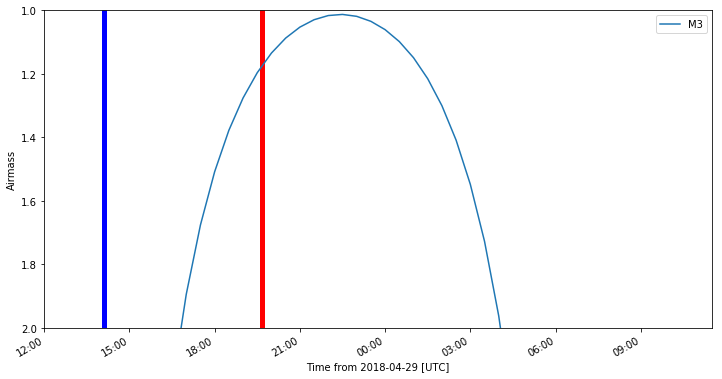

In [30]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)

fig.tight_layout()

for i, my_object in enumerate(targets):#enumerate grab the if statment

    if observing_table_a_p_o['ever observable'][i]:#ignore object I can't see
        ax = plot_airmass(my_object, a_p_o, window_time_grid, max_airmass=2.0)

ax.vlines(a_p_o_rise.datetime, 1,3, color='r', linewidth=5)
ax.vlines(a_p_o_set.datetime, 1,3, color='b', linewidth=5)

ax.legend();#loc=0,shadow=True);

In [31]:
for i, my_object in enumerate(targets):

    if observing_table_a_p_o['ever observable'][i]:
        name = observing_table_a_p_o['target name'][i]
        obj_frac = observing_table_a_p_o['fraction of time observable'][i]
        obj_time = obj_frac * observing_length
        output = "You can observe {0:s} for {1:.2f} at Apache Point observatory in December.".format(name, obj_time.to(u.h))
        print(output)
        
for i, my_object in enumerate(targets):

    if observing_table_a_p_o2['ever observable'][i]:
        name = observing_table_a_p_o2['target name'][i]
        obj_frac = observing_table_a_p_o2['fraction of time observable'][i]
        obj_time = obj_frac * observing_length2
        output = "You can observe {0:s} for {1:.2f} at Apache Point observatory in March.".format(name, obj_time.to(u.h))
        print(output)
    else:
        out = "You can not observe M31 in March."
        print(out)

You can observe M3 for 2.77 h at Apache Point observatory in December.
You can observe M3 for 0.98 h at Apache Point observatory in March.


In [47]:
#IC 418 has a RA of 05 27 28.2037, dec of -12 41' 50.265". RA: 5.45783, dec: -11.3027
#You could not see it in the summer so the best time to observe is winter or december. 
phase_d = ctio.moon_phase(observational_window_d) #phase = 2*pi is new moon. phase = 0 is full
phase_m = ctio.moon_phase(observational_window_m)

print('The Moon phase is {0} so it is about waning.'.format(phase_d))
print('The Moon phase is {0} so it is about new.'.format(phase_m))

The Moon phase is 2.0217122287179654 rad so it is about waning.
The Moon phase is 0.07450019146125471 rad so it is about new.


In [48]:
ctio = Observer(longitude = 70.804 * u.deg,
                    latitude =  -30.169 * u.deg,
                    elevation = 2200 * u.m,
                    timezone = 'Etc/GMT+3',
                    name = "CTIO"
                    )
ctio_timezone = ctio.timezone

observational_window_d = Time("2018-12-31 12:00:00")

observational_window_m = Time("2018-03-31 12:00:00")

beginning_ctio = observational_window_d.to_datetime(a_p_o_timezone)

print("The local time at the observational window is {0}".format(beginning_ctio))

The local time at the observational window is 2018-12-31 05:00:00-07:00


In [49]:
ctio_end = Time("2018-12-28 12:00:00")

ctio2_end = Time("2018-12-28 12:00:00")

ctio_rise = ctio.twilight_morning_astronomical(observational_window_d, which='next')

ctio_set = ctio.twilight_evening_astronomical(observational_window_d, which='nearest')

ctio2_rise = ctio.twilight_morning_astronomical(observational_window_m, which='next')

ctio2_set = ctio.twilight_evening_astronomical(observational_window_m, which='nearest')

print("Astronomical Evening Twilight starts at {0.iso} UTC".format(ctio_set))

print("Astronomical Morning Twilight starts at {0.iso} UTC".format(ctio_rise))

observing_length_d = (ctio_rise - ctio_set).to(u.h)

observing_length_m = (ctio2_rise - ctio2_set).to(u.h)

print("You can observe for {0:.1f} at Apache Point observatory in December.".format(observing_length_d))
print("You can observe for {0:.1f} at Apache Point observatory in March.".format(observing_length_m))


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


Astronomical Evening Twilight starts at 2018-12-31 15:57:49.126 UTC
Astronomical Morning Twilight starts at 2018-12-31 22:42:03.611 UTC
You can observe for 6.7 h at Apache Point observatory in December.
You can observe for 9.6 h at Apache Point observatory in March.


In [50]:
window_range_d = [observational_window_d, ctio_end]

window_range_m = [observational_window_m, ctio2_end]

window_time_grid_d = time_grid_from_range(window_range_d)

window_time_grid_m = time_grid_from_range(window_range_m)

#target_table = pd.read_csv('./Data/TargetList.csv')

#target_values = target_table.as_matrix()

targets = [FixedTarget(coord=SkyCoord(ra = 5.45783*u.hourangle, dec = -11.3027*u.deg), name='IC 418')]

targets

[<FixedTarget "IC 418" at SkyCoord (ICRS): (ra, dec) in deg (81.86745, -11.3027)>]

In [51]:
#Moon is at a dec of -12.07. So seperations is 18.099
constraints2 = [AirmassConstraint(2)]
constraints2.append(MoonSeparationConstraint(18.099*u.deg))

observing_range_ctio = [ctio_set, ctio_rise]

observing_range_ctio2 = [ctio2_set, ctio2_rise]

observing_table_ctio = observability_table(constraints2, ctio, targets, time_range = observing_range_ctio)

observing_table_ctio2 = observability_table(constraints2, ctio, targets, time_range = observing_range_ctio2)

print(observing_table_ctio)
print(observing_table_ctio2)

target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
     IC 418            True             False          0.9285714285714286
target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
     IC 418            True             False                         0.2


In [52]:
for i, my_object in enumerate(targets):

    if observing_table_ctio['ever observable'][i]:
        name = observing_table_ctio['target name'][i]
        obj_frac = observing_table_ctio['fraction of time observable'][i]
        obj_time = obj_frac * observing_length_d
        output = "You can observe {0:s} for {1:.2f} at Cerro Tololo Observatory in December.".format(name, obj_time.to(u.h))
        print(output)
        
for i, my_object in enumerate(targets):

    if observing_table_ctio2['ever observable'][i]:
        name = observing_table_ctio2['target name'][i]
        obj_frac = observing_table_ctio2['fraction of time observable'][i]
        obj_time = obj_frac * observing_length_m
        output = "You can observe {0:s} for {1:.2f} at Cerro Tololo Observatory in March.".format(name, obj_time.to(u.h))
        print(output)
    else:
        out = "You can not observe M31 in March."
        print(out)

You can observe IC 418 for 6.26 h at Cerro Tololo Observatory in December.
You can observe IC 418 for 1.91 h at Cerro Tololo Observatory in March.


In [1]:
#I would like to note that during this coding, I was feveriously working on it. 
#Due to mental imparments, I was aware of what I was doing, but I was unaware of the code around me. 
#I tried my best over the weekend to observe the sky. It was cloudy each night I checked. 

In [1]:
#april 30th to may 1st we have observing time. 
#ESO https://www.eso.org
#staralt
#today start a lab with a partner
#Nasa has a collection of archieved catalog. 
#astropy.coordinates.EarthLocation.get_site_names()

In [5]:
lowell = Observer(longitude = 105.82027777778 * u.deg,
                    latitude =  32.7802778 * u.deg,
                    elevation = 2788 * u.m,
                    timezone = 'US/Mountain',
                    name = "Apache Point Observatory"
                    )
lowell_timezone = a_p_o.timezone

observational_window = Time("2018-12-31 12:00:00")

observational_window2 = Time("2018-03-31 12:00:00")

beginning_a_p_o = observational_window.to_datetime(a_p_o_timezone)

print("The local time at the observational window is {0}".format(beginning_a_p_o))

NameError: name 'astropy' is not defined

In [ ]:
#4/04/2018. Worked on fitting and working code for the HW assignment.
#got most of the code writen and ran the first half. First half was completed without errors. 
#The moon is a big trouble for us. The declination is right on top of our mean value for the data point's dec.
#I have thought of this problem extensively, Firstly, its only on this spot on the first day, but since we are taking
#the differenece between first and last observations. I can do one of the following, create a for loop for each
#day and each position the moon will be in, ignore the moon, pick different points, or track the moon as it crosses
#the sky and make a for loop for moon seperations distance. 

In [1]:
#4/06/2018, Supercloudy week! No observations done. 
#Spent the entire day getting new data points as we learned that the data we had didn't have enough variation.
#Finished the code the class before and only freshened it up today. 

In [2]:
#4/09/2018, searched the entire weekend and found that there wasn't a single cloundless night except friday,
#which I skipped because I was felling really bad taht day.
#Observing data project: based on new observations or archiveal pages
#8-10 pages. without plots
#is worth 30% of final grade. 
#structured like a scientific data. Introcdutions, data, analysis, Results, conclusion. It will be graded on the rubric
#in canvas. If data isn't deep enough, still write what you look for. 
#April 20th observng project purposal due.
#May 18th first draft
#May 25th second draft
#June 1st final draft
#latex template will be provided. Can work in groups but need to submit own paper and code. 
#april 30th - may 1st- birght A half nights on APO 3.5m. Imaging or spec
#The Awing telescope is abaliable for observations.
#make sure you understand what the data your looking at in archival data. 
#Reading scientific papers: start with the abstract, does the paper sound interesting? 
#look at the plots. What are they saying.
#Read the conclusion, go back to the beginning and start from the top. 
#voxcharta is a good way to find topics. 
#annual review of astronomy and astrophysics article. 
#Waited till night to see nothing but clouds. 

In [1]:
#Project ideas, Looking into the question of how the magnetic fields from magnetars affect a star its companioned with
#Looking into Hypernovas. 
#TYC 3162 - 665-1 
#If a magnetar is in binary with another star, theortically, the side of the star that faces the magnetar will have
#more solar flares than the other.
#Low mass star binay or acresion disk. 
#count of the amount of stars in the orion nebula.https://ui.adsabs.harvard.edu/#abs/2001AJ....121.3160C/abstract
#alternative nebula, M1-92 at apo, nicfps, TRIPLESPEC
#Another idea, find the age of a globular cluster with spectroscopic data. target M3,M5,M13,M53,NGC4147,NGC5053,
#open clusters: coma, 
#IRC+10420 hypergiant geometroy from optical spectra.
#due 4/20th

In [1]:
#4/11/2018 Basics of observational observation.
#What do we want to know about the star. 
#We use mirrors to avoid harder aborations that we need to calculate.
#Apparent mag Luminosity need to know distance to the object because of apparent mag. f=1/d^2
#Resolution, R=wavelength/aperture. 
#Flux per unit wavelength, for spec.
#Working everywhere but were focusing on visible and may not work for the other bands.
#Filters block certain light so you can see what light is being made. 
#Lot of filters can be used for making low res spectrograph.
#differential vs absoulte photometry, both include comparison to another star.
#differential comparison to a star of unknown luminosity.
#absolute comparison to a star of known luminosity. Want star to be close to same magnitude.
#stars are not square like our detectors.Toss all partial pixels.could use those pixels(even though they will have sky)
#Could use a weighting scheme.
#Intervening materials. weather, dust, sky brightness, cranes, airmass.
#Histogram function is completely missing from DS9.

In [1]:
#4/13/2018 Worked on the fits files assignment. 
#The histograms function was missing from the ds9 and I was unable to do anything with histograms. 
#Been rainy all week and been unable to observe on any night. 
#Going to spend some time over the weekned looking at low mass star binaries. 

In [1]:
#4/16/2018 Spent little time looking at low mass binaries and instead opted to look for stars count in orion.
#The entire weekend was cloudy.
#ccd's and electronics on friday.
#the bias or overscan is the black bar in the center. At the edges it was fainter but still a good square.
#Scattered light at the black sections is from scattered lights.
#not all telescopes record ra and dec
#for the histograms we found in the hw problem:
#poisson distributions, gaussian distribution. We look at our regions and figure out whether it was poisson or gaussian
#65000 counts is the saturation of the ccd's were using.
#poisson = photon> independant (quasi)
#gaussian = variations in ccd readouts\electonics will cause a normal distribution around the bias level
#you can also calculate the read noise and gain from this histogram
#HCG is hickson compact group or galaxy cluster survey.
#Group been in the top right so that it is off the electronics.
#The dec and ra is slightly off because the telescope was slightly off because of above
#wash filter avoids skyline faint background.
#you lose extra light using a different filter in 1 observation, vs another, based on design. that's why apo images
#Might look different from flatfits file because of the optical path design, things may very. 
#detectors ccds: the collect then pass charges off. pixles are like buckets. When a bucket is full, it spills out
#into the other pixels. ccds count for the minutes you ask for. It doesn't know when a photon was hit, just that it did
#electrodes get charged and the charge gets carried on a silicon material to a computer.
#readouts take time. They read out one rows that falls, and one pixel at a time. 20-40s is a good readout time.
#Quantum efficency in %, how a ccd coverts photons into electricity. coatings of metal give far greater percentage.
#ccd's work at liquid nitrogen temps since they give lots of dark current since everything is moving in the atoms.
#dark current
#12-15 um pixels are a standard pixel detectors. with small pixels, they take longer to get pixels into the buckets.
#ccds are good because they are linear, pixels can saturate, gain is intrinsic, responsive in the optical fundamentally
#a material issues, ccds have become commercially viable.
#CMOS detectors reads out in each pixel. Issues around nose, heat and distance. because electronics fill pixel, image >
#Signal to noise, the lower the harder it is to idenfity what you're looking at. 
#ccds have several noise makers, short noise thermal, read noise bias. 
#too large of a signal to noise will make operations long and its expensive to run.
#Shot noise photons hit the chip and when they get there is dictated by poisson statistics 
#so you will not get the same number at a given time.

In [1]:
#4/18/2018
#https://python4astronomers.github.io/core/numpy_scipy.html unfinished
#Observed tonight and got an image of a few stars directly above me.I have not decomposed what I've seen yet.
#Managed to get through most of what you had assigned but was unable to complete. 

In [1]:
#4/20/2018 Completed the purposal and decided to go for observing and trying to understand yellow hypergiant IRC+10420
#This specific star is great for observing due to the shear amount of observation there is on it and it is
#Observed in the obtical. I'm concerned about witch spectra instrument to use at the APO telescope
#I am also concerned that I will not have enough for a 10 page paper. IRC+10420 is observable on the schedualed time
#My goal is to understand the propertiesandI'm concerned that I wont get enough info to know its more unique properties
#Rushed to work on the lab today.

In [2]:
#4/23/2018 Finished answering the questions on the fourth problem but did not write them up. 
#Observed tonight. Saw a few different stars since the last obvservation. For some reason I think I'm looking at the
#big dipper

In [1]:
#4/25/2018 Gia data catalog on variable stars has been made public.
#Project IRC 10420 spectra take, wolfray rey and AGB spectra to compare. IRC not visable when we can obvserve in apo
#We can take spectra using a never before use spectragraph here in the school. 
#Need to search for IRC counter parts that can be viewed in our observing time. 
#High resolution spectrograph to observe IRC
#By friday, need to find out how we are observing

In [ ]:
#4/27/2018 Searched for substitutes to IRC 10420 and could only find them on the opposite side of the nightsky ie. 0ra
#IRC+10420 V and mag 11.66
#Potential AGB, NR Vulpeculae or V* NR Vul, V band mag 9.36
#Potential Wolf-Rayet stars WR 139 or HD 193576 Vband mag 8, WR 140or HD 193793 Vband mag 7.25, WR 147 or 
#EM* AS 431 Vband mag 14.89
#These magnitudes were what you asked me to sent to you to determine exposure time. Since I will have only two to
#three hours to observe each star. 
#Worked on getting the data for CCD in class. We have rather great data.